<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TensorFlow/Probabilistic/Distributions/Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.18.0
TFP version: 0.25.0


In [2]:
# Additional imports and setting fixed random seed to have reproducibility

import matplotlib.pyplot as plt
import numpy as np
tf.random.set_seed(seed=42)

# Tensorflow Distributions

## Coding Tutorials
#### 1. [Univariate Distributions](#univariate_distributions)
#### 2. [Multivariate Distributions](#multivariate_distributions)
#### 3. [The Independent Distribution](#the_independent_distribution)
#### 4. [Sampling and log probs](#sampling_and_log_probs)
#### 5. [Trainable Distributions](#trainable_distributions)

***
## Univariate distributions
<a id='univariate_distributions'></a>

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

normal = tfp.distributions.Normal(loc=0., scale=1.)
print(normal)

print(normal.sample(sample_shape=3))
print(normal.prob(value=0.5))
print(normal.log_prob(value=0.5))

tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)
tf.Tensor([ 0.3274685 -0.8426258  0.3194337], shape=(3,), dtype=float32)
tf.Tensor(0.35206532, shape=(), dtype=float32)
tf.Tensor(-1.0439385, shape=(), dtype=float32)


In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

bernoulli = tfp.distributions.Bernoulli(probs=0.7)
print(bernoulli)

bernouli = tfp.distributions.Bernoulli(logits=0.847)
print(bernoulli.sample(sample_shape=3))
print(bernoulli.prob(value=1))
print(bernoulli.log_prob(value=1))

batched_bernoulli = tfp.distributions.Bernoulli(probs=[0.4, 0.5])
print(batched_bernoulli)
print(batched_bernoulli.batch_shape)
print(batched_bernoulli.sample(sample_shape=3))
print(batched_bernoulli.prob(value=[1, 1]))

tfp.distributions.Bernoulli("Bernoulli", batch_shape=[], event_shape=[], dtype=int32)
tf.Tensor([1 1 0], shape=(3,), dtype=int32)
tf.Tensor(0.7, shape=(), dtype=float32)
tf.Tensor(-0.35667497, shape=(), dtype=float32)
tfp.distributions.Bernoulli("Bernoulli", batch_shape=[2], event_shape=[], dtype=int32)
(2,)
tf.Tensor(
[[1 1]
 [0 1]
 [1 0]], shape=(3, 2), dtype=int32)
tf.Tensor([0.4 0.5], shape=(2,), dtype=float32)


In [3]:
# Create a normal distribution from Tensorflow Distributions
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

normal = tfp.distributions.Normal(loc=0, scale=1)
normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [4]:
# Sample from the chosen distribution...

normal.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=0.32746851444244385>

In [5]:
# ... or sample multiple times

normal.sample(sample_shape=10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 8.4224582e-02, -8.6090374e-01,  3.7812304e-01, -5.1962738e-03,
       -4.9453196e-01,  6.1781919e-01, -3.3082047e-01, -1.3840806e-03,
       -4.2373410e-01, -1.3872087e+00], dtype=float32)>

In [6]:
# Obtain value of probability's density

normal.prob(value=0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.3989422917366028>

In [7]:
# Obtain value of logprobability

normal.log_prob(value=0)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385175704956>

In [8]:
# Verify that this really is the log of the probability
import numpy as np

np.log(normal.prob(value=0))

np.float32(-0.9189385)

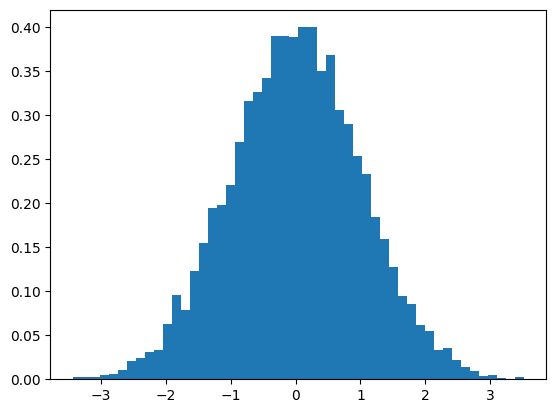

In [9]:
# Plot a histogram, approximating the density
import matplotlib.pyplot as plt

plt.hist(x=normal.sample(sample_shape=10000), bins=50, density=True)
plt.show()

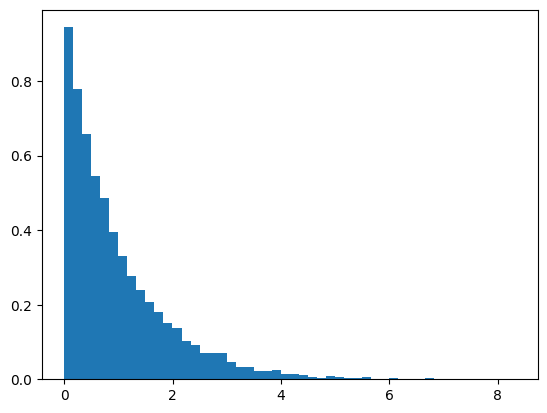

In [10]:
# Do the same for the exponential distribution
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)
import matplotlib.pyplot as plt

exponential = tfp.distributions.Exponential(rate=1)
plt.hist(x=exponential.sample(sample_shape=10000), bins=50, density=True)
plt.show()

In [11]:
# Sample as before

exponential.sample(sample_shape=10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2.1462562 , 1.3011539 , 0.04947   , 0.6993898 , 1.082343  ,
       0.62250125, 0.7877366 , 0.94240695, 0.03540716, 0.0604223 ],
      dtype=float32)>

In [12]:
# Create a Bernoulli distribution (discrete)
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

bernoulli = tfp.distributions.Bernoulli(probs=0.8)
bernoulli.sample(sample_shape=20)

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
      dtype=int32)>

#### A word of caution on discrete distributions

In [13]:
# Calculate Bernoulli prob and see that 0.5 and -1 do not give the correct probability!

for k in [0, 0.5, 1, -1]:
    print('prob result {} for k = {} '.format(bernoulli.prob(value=k), k))

prob result 0.19999998807907104 for k = 0 
prob result 0.3999999761581421 for k = 0.5 
prob result 0.800000011920929 for k = 1 
prob result 0.04999999701976776 for k = -1 


In [ ]:
# Replicate the scores to see what is occurring under the hood
import numpy as np

def my_bernoulli(p_success, k):
    return np.power(x1=p_success, x2=k)*np.power(x1=(1-p_success), x2=(1-k))

In [ ]:
# Evaluate it as before

for k in [0, 0.5, 1, -1]:
    print('prob result {} for k = {} '.format(
        my_bernoulli(p_success=0.8, k=k), k))

prob result 0.19999999999999996 for k = 0 
prob result 0.3999999999999999 for k = 0.5 
prob result 0.8 for k = 1 
prob result 0.049999999999999975 for k = -1 


#### Work with batch distributions

In [ ]:
# Create a batched Bernoulli distribution
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

bernoulli_batch = tfp.distributions.Bernoulli(
    probs=[0.1, 0.25, 0.5, 0.75, 0.9])
bernoulli_batch

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [ ]:
# Sample from it, noting the shape

bernoulli_batch.sample(sample_shape=5)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[0, 0, 1, 0, 1],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 0]], dtype=int32)>

In [ ]:
# Use a batch shape with higher rank
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

probs = [[
    [0.5, 0.5],
    [0.8, 0.3],
    [0.25, 0.75]
]]
bernoulli_batch_2D = tfp.distributions.Bernoulli(probs=probs)
bernoulli_batch_2D

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [ ]:
# Sample from this batch of distributions

bernoulli_batch_2D.sample(sample_shape=5)

<tf.Tensor: shape=(5, 1, 3, 2), dtype=int32, numpy=
array([[[[0, 1],
         [1, 1],
         [1, 1]]],


       [[[1, 0],
         [1, 0],
         [0, 1]]],


       [[[1, 0],
         [1, 1],
         [0, 1]]],


       [[[1, 1],
         [1, 0],
         [0, 1]]],


       [[[1, 0],
         [1, 0],
         [0, 1]]]], dtype=int32)>

In [ ]:
# Determine probabilities from this batch distribution

bernoulli_batch_2D.prob(value=[[
    [1, 0], [0, 0], [1, 1]
]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.5       , 0.5       ],
        [0.19999999, 0.7       ],
        [0.25      , 0.75      ]]], dtype=float32)>

***
<a id='multivariate_distributions'></a>
## Multivariate Distributions


In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

mv_normal = tfp.distributions.MultivariateNormalDiag(
    loc=[-1., 0.5], scale_diag=[1., 1.5])
print(mv_normal)
print(mv_normal.event_shape)
print(mv_normal.sample(sample_shape=3))
print(mv_normal.log_prob(value=[-0.2, 1.8]))

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[], event_shape=[2], dtype=float32)
(2,)
tf.Tensor(
[[-2.1329477  -0.05145192]
 [ 1.6533237  -0.79068637]
 [ 0.97920084  2.695866  ]], shape=(3, 2), dtype=float32)
tf.Tensor(-2.9388978, shape=(), dtype=float32)


In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

batched_normal = tfp.distributions.Normal(
    loc=[-1., 0.5], scale=[1., 1.5])
print(batched_normal)
print(batched_normal.sample(sample_shape=3))
print(batched_normal.log_prob(value=[-0.2, 1.8]))

tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32)
tf.Tensor(
[[-0.24021429 -0.29179263]
 [-1.2446698   0.32066905]
 [-0.06671739 -2.1635075 ]], shape=(3, 2), dtype=float32)
tf.Tensor([-1.2389386 -1.699959 ], shape=(2,), dtype=float32)


In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

batched_mv_normal = tfp.distributions.MultivariateNormalDiag(
    loc=[[-1., 0.5], [2., 0.], [-0.5, 1.5]],
    scale_diag=[[1., 1.5], [2., 0.5], [1., 1.]])
print(batched_mv_normal)
print(batched_mv_normal.sample(sample_shape=2))

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[3], event_shape=[2], dtype=float32)
tf.Tensor(
[[[ 0.9379679   0.28594485]
  [-0.97005343 -0.02898904]
  [-1.4361064  -0.03616452]]

 [[ 1.1636064   1.0744668 ]
  [ 2.62013     0.11132202]
  [-0.95681846  3.53867   ]]], shape=(2, 3, 2), dtype=float32)


#### Basic multivariate distributions

In [ ]:
# Define 2D multivariate Gaussian with diagonal covariance matrix
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

normal_diag = tfp.distributions.MultivariateNormalDiag(
    loc=[0, 1], scale_diag=[1, 2])
normal_diag

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [ ]:
# Sample from it

normal_diag.sample(sample_shape=10)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[-0.8980837 , -2.6518288 ],
       [-0.44441807, -1.9765894 ],
       [-0.7855463 ,  1.3923931 ],
       [ 0.17604655, -2.050501  ],
       [ 0.635294  ,  2.3362408 ],
       [ 1.4230527 ,  1.0912329 ],
       [-0.21692705, -2.416981  ],
       [ 0.5174161 ,  0.76055366],
       [-1.0614088 , -0.08182514],
       [ 0.08606925, -1.5563867 ]], dtype=float32)>

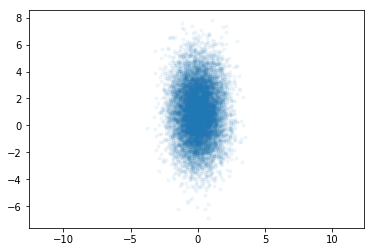

In [ ]:
# Make a plot
import matplotlib.pyplot as plt

plt_sample = normal_diag.sample(sample_shape=10000)
plt.scatter(x=plt_sample[:, 0], y=plt_sample[:, 1], marker='.', alpha=0.05)
plt.axis('equal')
plt.show()

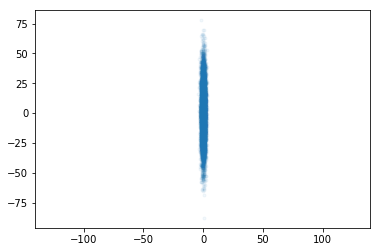

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

normal_diag = tfp.distributions.MultivariateNormalDiag(
    loc=[0, 1], scale_diag=[1, 20])
plt_sample = normal_diag.sample(sample_shape=10000)
plt.scatter(x=plt_sample[:, 0], y=plt_sample[:, 1], marker='.', alpha=0.05)
plt.axis('equal')
plt.show()

#### Batches of multivariate distributions

In [ ]:
# Create three "batches" of multivariate normals
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

normal_diag_batch = tfp.distributions.MultivariateNormalDiag(
    loc=[[0, 0], [0, 0], [0, 0]],
    scale_diag=[[1, 2], [2, 1], [2, 2]])
normal_diag_batch

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [ ]:
# Sample from it

samples = normal_diag_batch.sample(sample_shape=5)
samples

<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[-0.6383433 , -2.2985559 ],
        [-1.7312855 , -1.3332063 ],
        [-1.6465129 , -1.5238538 ]],

       [[ 0.4257505 ,  5.785669  ],
        [-0.68529975, -1.7522513 ],
        [-0.35573658, -1.88765   ]],

       [[ 0.11156012,  1.6149896 ],
        [-0.64763886,  1.0598668 ],
        [ 1.5587481 ,  0.00861878]],

       [[ 0.43864295, -1.2682985 ],
        [-2.6530807 ,  0.43822196],
        [ 0.7100409 ,  2.602631  ]],

       [[ 0.13832839,  1.582189  ],
        [ 3.270198  , -0.41152912],
        [ 0.01903997, -0.32847282]]], dtype=float32)>

In [ ]:
# Compute log probs

normal_diag_batch.log_prob(value=samples)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-3.395185 , -3.7944124, -3.8533134],
       [-6.8059015, -4.124921 , -3.6853929],
       [-2.863271 , -3.1451125, -3.5278926],
       [-2.8283005, -3.5068982, -4.133902 ],
       [-2.8535068, -3.9524767, -3.2377036]], dtype=float32)>

In [ ]:
# Create a sample for a plot -- notice the shape

plt_sample_batch =normal_diag_batch.sample(sample_shape=10000)
plt_sample_batch.shape

TensorShape([10000, 3, 2])

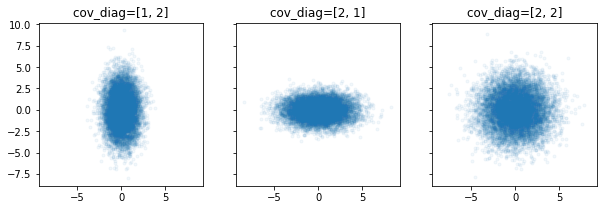

In [ ]:
# Plot samples from the batched multivariate Gaussian
import matplotlib.pyplot as plt

fig, axs = (plt.subplots(nrows=1, ncols=3,
    sharex=True, sharey=True, figsize=(10, 3)))
titles = ['cov_diag=[1, 2]', 'cov_diag=[2, 1]', 'cov_diag=[2, 2]']

for i, (ax, title) in enumerate(zip(axs, titles)):
    samples = plt_sample_batch[:, i, :] # take the ith batch [samples x event_shape]
    ax.scatter(x=samples[:, 0], y=samples[:, 1], marker='.', alpha=0.05)
    ax.set_title(label=title)
plt.show()



***
<a id='the_independent_distribution'></a>
## The Independent Distribution

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

mv_normal = tfp.distributions.MultivariateNormalDiag(
    loc=[-1., 0.5], scale_diag=[1., 1.5])
print(mv_normal)
print(mv_normal.log_prob(value=[-0.2, 1.8]))

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[], event_shape=[2], dtype=float32)
tf.Tensor(-2.9388978, shape=(), dtype=float32)


In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

batched_normal = tfp.distributions.Normal(
    loc=[-1., 0.5], scale=[1., 1.5])
print(batched_normal)
print(batched_normal.log_prob(value=[-0.2, 1.8]))

tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32)
tf.Tensor([-1.2389386 -1.699959 ], shape=(2,), dtype=float32)


In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

batched_normal = tfp.distributions.Normal(
    loc=[-1., 0.5], scale=[1., 1.5])

independent_normal = tfp.distributions.Independent(
    distributions=batched_normal, reinterpreted_batch_ndims=1)
print(independent_normal)
print(independent_normal.log_prob(value=[-0.2, 1.8]))

tfp.distributions.Independent("IndependentNormal", batch_shape=[], event_shape=[2], dtype=float32)
tf.Tensor(-2.9388976, shape=(), dtype=float32)


In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

batched_normal = tfp.distributions.Normal(
    loc=[[-1., 0.5], [0., 1.], [0.3, -0.1]],
    scale=[[1., 1.5], [0.2, 0.8], [2., 1.]])
print(batched_normal)

independent_normal = tfp.distributions.Independent(
    distribution=batched_normal,
    reinterpreted_batch_ndims=1)
print(independent_normal)

tfp.distributions.Normal("Normal", batch_shape=[3, 2], event_shape=[], dtype=float32)
tfp.distributions.Independent("IndependentNormal", batch_shape=[3], event_shape=[2], dtype=float32)


In [ ]:
# Start by defining a batch of two univariate Gaussians, then
# combine them into a bivariate Gaussian with independent components
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

locs = [-1., 1.]
scales = [0.5, 1.]
batch_of_normals = tfp.distributions.Normal(loc=locs, scale=scales)

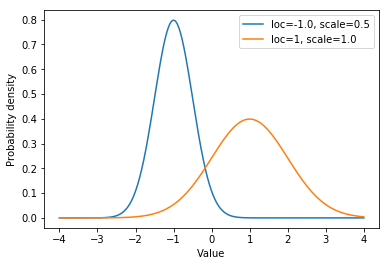

In [ ]:
# Univariate density functions
import numpy as np
np.random.seed(seed=42)
import matplotlib.pyplot as plt
import seaborn as sns

t = np.linspace(start=-4, stop=4, num=10000)
# each column is a vector of densities for one distn
densities = batch_of_normals.prob(value=np.repeat(
    a=t[:, np.newaxis], repeats=2, axis=1))

sns.lineplot(x=t, y=densities[:, 0],
    label='loc={}, scale={}'.format(locs[0], scales[0]))
sns.lineplot(x=t, y=densities[:, 1],
    label='loc={}, scale={}'.format(locs[1], scales[1]))
plt.ylabel(ylabel='Probability density')
plt.xlabel(xlabel='Value')
plt.legend()
plt.show()

In [ ]:
# Check their batch_shape and event_shape

batch_of_normals

<tfp.distributions.Normal 'Normal' batch_shape=[2] event_shape=[] dtype=float32>

In [ ]:
# Use Independent to convert the batch shape to the event shape
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

bivariate_normal_from_Independent = tfp.distributions.Independent(
    distribution=batch_of_normals,
    reinterpreted_batch_ndims=1)

In [ ]:
# Note that dimension from batch_shape has shifted to event_shape

bivariate_normal_from_Independent

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[2] dtype=float32>

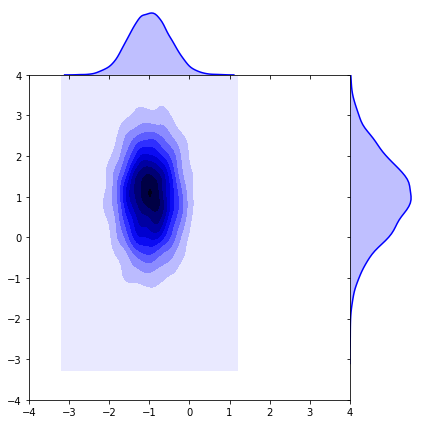

In [ ]:
# Create a plot showing joint density contours and marginal density functions
import matplotlib.pyplot as plt
import seaborn as sns

samples = bivariate_normal_from_Independent.sample(sample_shape=10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x=x1, y=x2, kind="kde", space=0, color='b',
    xlim=[-4, 4], ylim=[-4, 4])
plt.show()

In [ ]:
# Use MultivariateNormalDiag to create the equivalent distribution
# Note that diagonal covariance matrix => no correlation => independence (for the multivariate normal distribution)
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

bivariate_normal_from_Multivariate = tfp.distributions.MultivariateNormalDiag(
    loc=locs, scale_diag=scales)
bivariate_normal_from_Multivariate

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

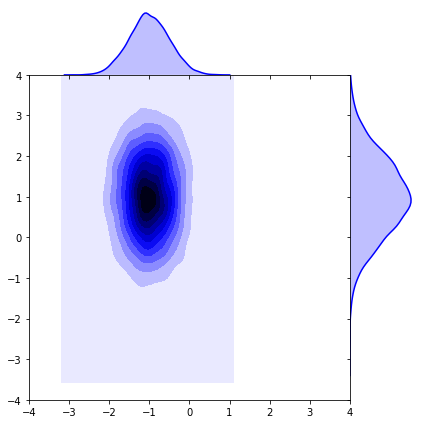

In [ ]:
# Plot the joint density function of bivariate_normal_from_Multivariate
# Refer back to bivariate_normal_from_Independent to show that the plot is the same
# Summarise how Independent has been used
import matplotlib.pyplot as plt
import seaborn as sns

samples = bivariate_normal_from_Multivariate.sample(sample_shape=10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x=x1, x=x2, kind="kde", space=0, color='b',
    xlim=[-4, 4], ylim=[-4, 4])
plt.show()

#### Shifting batch dimensions to event dimensions using
`reinterpreted_batch_ndims`

In [ ]:
# Demonstrate use of reinterpreted_batch_ndims
# By default all batch dims except the first are transferred to event dims
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

loc_grid = [
    [-100., -100.],
    [100., 100.],
    [0., 0.]
]
scale_grid = [
    [1., 10.],
    [1., 10.],
    [1., 1.]
]

normals_batch_3by2_event_1 = tfp.distributions.Normal(loc=loc_grid, scale=scale_grid)

In [ ]:
# Highlight batch_shape

normals_batch_3by2_event_1

<tfp.distributions.Normal 'Normal' batch_shape=[3, 2] event_shape=[] dtype=float32>

In [ ]:
# We now have a batch of 3 bivariate normal distributions,
# each parametrised by a column of our original parameter grid
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

normals_batch_3_event_2 = tfp.distributions.Independent(
    distribution=normals_batch_3by2_event_1)
normals_batch_3_event_2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[3] event_shape=[2] dtype=float32>

In [ ]:
# Evaluate log_prob

normals_batch_3_event_2.log_prob(value=[
    [-10., 10.], [100., 100.], [1., 1.]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-4.1146406e+03, -4.1404624e+00, -2.8378770e+00], dtype=float32)>

In [ ]:
# Can reinterpret _all_ batch dimensions as event dimensions
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

normals_batch_1_event_3by2 = tfp.distributions.Independent(
    distribution=normals_batch_3by2_event_1,
    reinterpreted_batch_ndims=2)
normals_batch_1_event_3by2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[3, 2] dtype=float32>

In [ ]:
# Take log_probs

normals_batch_1_event_3by2.log_prob(value=[
    [-10., 10.], [100., 100.], [1., 1.]])

<tf.Tensor: shape=(), dtype=float32, numpy=-4121.619>

#### Using `Independent` to build a Naive Bayes classifier

#### Introduction to `newsgroups` data set

In this tutorial, just load the dataset, fetch train/test splits, probably choose a subset of the data.

Construct the class conditional feature distribution (with Independent, using the Naive Bayes assumption) and sample from it.

We can just use the ML estimates for parameters, in later tutorials we will learn them.

In [ ]:
# Convenience function for retrieving the 20 newsgroups data set

# Usenet was a forerunner to modern internet forums
# Users could post and read articles
# Newsgroup corresponded to a topic
# Example topics in this data set: IBM computer hardware, baseball
# Our objective is to use an article's contents to predict its newsgroup,
# a 20-class classification problem.

# 18000 newsgroups, posts on 20 topics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Get the train data
from sklearn import datasets

newsgroups_data = datasets.fetch_20newsgroups(
    data_home='20_Newsgroup_Data/', subset='train')

In [ ]:
# More information about the data set

print(newsgroups_data['DESCR'])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [ ]:
# Example article

print(newsgroups_data['data'][0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [ ]:
# Associated label

newsgroups_data['target'][0]

7

In [ ]:
# Name of label

newsgroups_data['target_names'][7]

'rec.autos'

In [ ]:
# Preprocessing boilerplate
from sklearn.feature_extraction import text

n_documents = len(newsgroups_data['data'])

count_vectorizer = text.CountVectorizer(input='content', binary=True,
    max_df=0.25, min_df=1.01/n_documents) # ignore common words, words that appear once
binary_bag_of_words = count_vectorizer.fit_transform(
    raw_documents=newsgroups_data['data']) # input is a list of strings

In [ ]:
# Check shape

binary_bag_of_words.shape

(11314, 56365)

In [ ]:
# Check that the fit has been successful

count_vectorizer.inverse_transform(X=binary_bag_of_words[0, :])

[array(['lerxst', 'wam', 'umd', 'where', 'thing', 'car', 'rac3',
        'maryland', 'college', 'park', '15', 'wondering', 'anyone',
        'could', 'enlighten', 'saw', 'day', 'door', 'sports', 'looked',
        'late', '60s', 'early', '70s', 'called', 'bricklin', 'doors',
        'were', 'really', 'small', 'addition', 'front', 'bumper',
        'separate', 'rest', 'body', 'tellme', 'model', 'name', 'engine',
        'specs', 'years', 'production', 'made', 'history', 'whatever',
        'info', 'funky', 'looking', 'please', 'mail', 'thanks', 'il',
        'brought', 'neighborhood'], dtype='<U80')]

In [ ]:
# Dict that will be useful later

inv_vocabulary = {value:key for key, value
    in count_vectorizer.vocabulary_.items()}

#### A Naive Bayes classifier for `newsgroup`

Each feature vector $x$ is a list of indicators for whether a word appears in the article. $x_i$ is 1 if the $i$th word appears, and 0 otherwise. `inv_vocabulary` matches word indices $i$ to words.

Each label $y$ is a value in $0, 1, \ldots, 19$.

The parts of a naive Bayes classifier for this problem can be summarised as:  


- A probability distribution for the feature vector by class, $p(x|y = j)$ for each $j = 0, 1, \ldots, 19$. These probability distributions are assumed to have independent components: we can factorize the joint probability as a product of marginal probabilities
\begin{equation}
    p(x|y = j) = \prod_{i=1}^d p(x_i|y = j)
\end{equation}
These marginal probability distributions are Bernoulli distributions, each of which has a single parameter $\theta_{ji} := p(x_i = 1|y = j)$. This parameter is the probability of observing word $i$ in an article of class $j$.

- We will use the Laplace smoothed maximum likelihood estimate to compute these parameters. Laplace smoothing involves adding small counts to every feature for each class. Else, if a feature did not appear in the training set of a class, but then we observed it in our test data the log probability would be undefined.

- A collection of class prior probabilities $p(y = j)$. These will be set by computing the class base rates in the training set.  


- A function for computing the probability of class membership via Bayes' theorem:  

\begin{equation}
    p(y = j|x) = \frac{p(x|y = j)p(y = j)}{p(x)}
\end{equation}

In [ ]:
# Compute the parameter estimates (adjusted fraction of documents in class that contain word)
import numpy as np

n_classes = newsgroups_data['target'].max() + 1
y = newsgroups_data['target']
n_words = binary_bag_of_words.shape[1]

alpha = 1e-6 # parameters for Laplace smoothing

theta = np.zeros(shape=[n_classes, n_words]) # stores parameter values - prob. word given class
for c_k in range(n_classes): # 0, 1, ..., 19
    class_mask = (y == c_k)
    N = class_mask.sum() # number of articles in class
    theta[c_k, :] = (binary_bag_of_words[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

In [ ]:
# Check whether the most probable word in each class is reasonable

most_probable_word_ix = theta.argmax(axis=1) # most probable word for each class

for j, ix in enumerate(most_probable_word_ix):
    print('Most probable word in class {} is "{}".'.format(
        newsgroups_data['target_names'][j], inv_vocabulary[ix]))

Most probable word in class alt.atheism is "people".
Most probable word in class comp.graphics is "graphics".
Most probable word in class comp.os.ms-windows.misc is "windows".
Most probable word in class comp.sys.ibm.pc.hardware is "thanks".
Most probable word in class comp.sys.mac.hardware is "mac".
Most probable word in class comp.windows.x is "window".
Most probable word in class misc.forsale is "sale".
Most probable word in class rec.autos is "car".
Most probable word in class rec.motorcycles is "dod".
Most probable word in class rec.sport.baseball is "he".
Most probable word in class rec.sport.hockey is "ca".
Most probable word in class sci.crypt is "clipper".
Most probable word in class sci.electronics is "use".
Most probable word in class sci.med is "reply".
Most probable word in class sci.space is "space".
Most probable word in class soc.religion.christian is "god".
Most probable word in class talk.politics.guns is "people".
Most probable word in class talk.politics.mideast is 

In [ ]:
# Define a distribution for each class
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

batch_of_bernoullis = tfp.distributions.Bernoulli(probs=theta)
p_x_given_y = tfp.distributions.Independent(
    distribution=batch_of_bernoullis,
    reinterpreted_batch_ndims=1)
p_x_given_y

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[20] event_shape=[56365] dtype=int32>

In [ ]:
# Take a sample of words from each class

n_samples = 10
sample = p_x_given_y.sample(sample_shape=n_samples)
sample.shape

TensorShape([10, 20, 56365])

In [ ]:
# Choose a class

chosen_class = 15
newsgroups_data['target_names'][chosen_class]

'soc.religion.christian'

In [ ]:
# Indicators for words that appear in the sample

class_sample = sample[:, chosen_class, :]
class_sample

<tf.Tensor: shape=(10, 56365), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>

In [ ]:
# Perform inverse transform to test quality of fit

count_vectorizer.inverse_transform(X=class_sample)

[array(['03', '09', '5of5', 'able', 'add', 'advocate', 'agony', 'alone',
        'altogether', 'andy', 'aside', 'assume', 'been', 'before',
        'better', 'bible', 'biblical', 'blood', 'boundary', 'cgsvax',
        'changers', 'changes', 'christ', 'christian', 'chuck', 'clear',
        'closed', 'create', 'deplorable', 'did', 'encounters',
        'engineering', 'entirely', 'eventually', 'exhibit', 'existence',
        'expressions', 'fell', 'fenholt', 'foard', 'form', 'garnet',
        'germane', 'giving', 'god', 'grounds', 'group', 'guarding', 'hast',
        'he', 'heart', 'him', 'his', 'homeland', 'however', 'idea',
        'involved', 'jerry', 'jews', 'july', 'killed', 'language', 'later',
        'lives', 'made', 'mail', 'many', 'mark', 'mateo', 'may', 'mention',
        'messengers', 'might', 'moderate', 'mserv', 'muslim', 'night',
        'nor', 'note', 'nothing', 'now', 'objection', 'occurred',
        'offence', 'oh', 'opposition', 'others', 'own', 'particular',
        'p

***
<a id='sampling_and_log_probs'></a>
## Sampling and log probs

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

exp = tfp.distributions.Exponential(rate=[
    [1., 1.5, 0.8],
    [0.3, 0.4, 1.8]
])
print(exp)

tfp.distributions.Exponential("Exponential", batch_shape=[2, 3], event_shape=[], dtype=float32)


In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

ind_exp = tfp.distributions.Independent(
    distribution=exp)
print(ind_exp)
ind_exp.sample(sample_shape=4)

tfp.distributions.Independent("IndependentExponential", batch_shape=[2], event_shape=[3], dtype=float32)


<tf.Tensor: shape=(4, 2, 3), dtype=float32, numpy=
array([[[2.0702589 , 0.3715358 , 1.5078305 ],
        [2.0160003 , 0.8194701 , 0.13169341]],

       [[1.1786911 , 0.4869406 , 0.5312396 ],
        [7.0400877 , 2.5339499 , 0.7816141 ]],

       [[1.4829985 , 0.43582234, 0.17628318],
        [4.1703377 , 1.7739688 , 0.21836655]],

       [[0.82059306, 0.47652078, 0.27015528],
        [0.36073983, 1.1289716 , 0.38374943]]], dtype=float32)>

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

rates = [
    [[[1., 1.5, 0.8], [0.3, 0.4, 1.8]]],
    [[[0.2, 0.4, 1.4], [0.4, 1.1, 0.9]]]
]
exp = tfp.distributions.Exponential(rate=rates)
print(exp)

ind_exp = tfp.distributions.Independent(
    distribution=exp,
    reinterpreted_batch_ndims=2)
print(ind_exp)

ind_exp.sample(sample_shape=[4, 2])

tfp.distributions.Exponential("Exponential", batch_shape=[2, 1, 2, 3], event_shape=[], dtype=float32)
tfp.distributions.Independent("IndependentExponential", batch_shape=[2, 1], event_shape=[2, 3], dtype=float32)


<tf.Tensor: shape=(4, 2, 2, 1, 2, 3), dtype=float32, numpy=
array([[[[[[1.1688496e-01, 1.3940759e+00, 3.2367122e-01],
           [1.2607672e+00, 1.0991330e+00, 1.4211791e+00]]],


         [[[1.4345082e+00, 1.1746719e+00, 3.4733622e+00],
           [1.4778179e+00, 1.5964347e-01, 9.2086816e-01]]]],



        [[[[4.4359408e-02, 1.8396074e-01, 1.3666283e-01],
           [2.7013462e+00, 2.8146152e+00, 5.9221864e-01]]],


         [[[4.5716897e-01, 6.2978739e-01, 7.5584583e-02],
           [1.7116343e+00, 7.2525924e-01, 5.7885551e-01]]]]],




       [[[[[3.3041403e-01, 5.8074724e-02, 2.2947935e-02],
           [3.4400508e+00, 5.5257030e+00, 3.0603623e-01]]],


         [[[8.0691500e+00, 1.3249278e+00, 4.2386916e-02],
           [2.0978230e-01, 2.8369925e+00, 1.4586096e+00]]]],



        [[[[3.9800149e-01, 3.6222330e-01, 9.2653744e-03],
           [4.6853161e+00, 7.5854087e+00, 6.8124211e-01]]],


         [[[7.5648105e-01, 1.8424749e-01, 8.1986779e-01],
           [4.3242759e-01, 2.70341

In [ ]:
ind_exp.log_prob(value=0.5)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-4.2501554],
       [-5.3155975]], dtype=float32)>

In [ ]:
ind_exp.log_prob(value=[[0.3, 0.5, 0.8]])

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-4.7701554],
       [-5.885597 ]], dtype=float32)>

In [ ]:
import tensorflow as tf
tf.random.set_seed(seed=42)

ind_exp.log_prob(value=tf.random.uniform(shape=(5, 1, 1, 2, 1)))

<tf.Tensor: shape=(5, 2, 1), dtype=float32, numpy=
array([[[-4.4304047],
        [-5.5007524]],

       [[-4.1906886],
        [-5.4167533]],

       [[-5.283875 ],
        [-5.831998 ]],

       [[-4.255939 ],
        [-5.101289 ]],

       [[-4.2809563],
        [-5.345421 ]]], dtype=float32)>

In [ ]:
# Make Multivariate Distribution
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

normal_distributions = tfp.distributions.MultivariateNormalDiag(
    loc=[[0.5, 1], [0.1, 0], [0, 0.2]],
    scale_diag=[[2, 3], [1, 3], [4, 4]])
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [ ]:
# Sample

normal_distributions.sample(sample_shape=5)

<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[-0.77668655, -2.4478338 ],
        [-0.7656427 , -3.999619  ],
        [-3.2930257 , -2.8477075 ]],

       [[ 1.351501  ,  9.678503  ],
        [-0.24264988, -5.256754  ],
        [-0.71147317, -3.5753    ]],

       [[ 0.7231202 ,  3.4224844 ],
        [-0.22381943,  3.1796002 ],
        [ 3.1174963 ,  0.21723756]],

       [[ 1.377286  , -0.9024477 ],
        [-1.2265403 ,  1.3146659 ],
        [ 1.4200819 ,  5.405262  ]],

       [[ 0.77665675,  3.3732834 ],
        [ 1.7350991 , -1.2345874 ],
        [ 0.03807994, -0.45694566]]], dtype=float32)>

In [ ]:
# Multivariate Normal batched Distribution
# We are broadcasting batch shapes of `loc` and `scal_diag`
# against each other
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

loc = [
    [[0.3, 1.5, 1.], [0.2, 0.4, 2.8]],
    [[2., 2.3, 8], [1.4, 1, 1.3]]
]
scale_diag = [0.4, 1., 0.7]
normal_distributions = tfp.distributions.MultivariateNormalDiag(
    loc=loc, scale_diag=scale_diag)
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[2, 2] event_shape=[3] dtype=float32>

In [ ]:
# Use independent to move part of the batch shape
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

ind_normal_distributions = tfp.distributions.Independent(
    distribution=normal_distributions,
    reinterpreted_batch_ndims=1)
ind_normal_distributions

<tfp.distributions.Independent 'IndependentMultivariateNormalDiag' batch_shape=[2] event_shape=[2, 3] dtype=float32>

In [ ]:
# Draw some samples

samples = ind_normal_distributions.sample(sample_shape=5)
samples.shape

TensorShape([5, 2, 2, 3])

In [ ]:
# `[B, E]` shaped input
import tensorflow as tf
tf.random.set_seed(seed=42)

inp = tf.random.uniform(shape=(2, 2, 3))
ind_normal_distributions.log_prob(value=inp)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-12.346934, -75.82132 ], dtype=float32)>

In [ ]:
# `[E]` shaped input (broadcasting over batch size)
import tensorflow as tf
tf.random.set_seed(seed=42)

inp = tf.random.uniform(shape=(2, 3))
ind_normal_distributions.log_prob(value=inp)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-12.441522, -73.21494 ], dtype=float32)>

In [ ]:
#`[S, B, E]` shaped input (broadcasting over samples)
import tensorflow as tf
tf.random.set_seed(seed=42)

inp = tf.random.uniform(shape=(9, 2, 2, 3))
ind_normal_distributions.log_prob(value=inp)

<tf.Tensor: shape=(9, 2), dtype=float32, numpy=
array([[-10.139837, -71.34117 ],
       [ -9.772417, -72.8571  ],
       [-12.456754, -68.5202  ],
       [ -9.006897, -71.11014 ],
       [ -9.342809, -81.18157 ],
       [ -9.947431, -68.748116],
       [ -7.176448, -66.988945],
       [-11.469181, -80.726776],
       [-10.869421, -64.40857 ]], dtype=float32)>

In [ ]:
# `[S, b, e]` shaped input, where [b, e] is broadcastable over [B, E]
import tensorflow as tf
tf.random.set_seed(seed=42)

inp = tf.random.uniform(shape=(5, 1, 2, 1))
ind_normal_distributions.log_prob(value=inp)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ -9.286251, -63.888245],
       [-10.366593, -83.21844 ],
       [-10.17972 , -78.43152 ],
       [ -9.265926, -67.43485 ],
       [ -9.444034, -73.98662 ]], dtype=float32)>

#### Naive Bayes example

Lets now use what we have learned and continue the Naive Bayes classifier we were building last tutorial.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [ ]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels
from sklearn import datasets
from sklearn.feature_extraction import text

def get_data(categories):
    newsgroups_train_data = datasets.fetch_20newsgroups(
        data_home='20_Newsgroup_Data/',
        subset='train', categories=categories)
    newsgroups_test_data = datasets.fetch_20newsgroups(
        data_home='20_Newsgroup_Data/',
        subset='test', categories=categories)

    n_documents = len(newsgroups_train_data['data'])
    count_vectorizer = text.CountVectorizer(input='content',
        binary=True, max_df=0.25, min_df=1.01/n_documents)

    train_binary_bag_of_words = count_vectorizer.fit_transform(
        raw_documents=newsgroups_train_data['data'])
    test_binary_bag_of_words = count_vectorizer.transform(
        raw_documents=newsgroups_test_data['data'])

    return (train_binary_bag_of_words.todense(),
            newsgroups_train_data['target']), \
        (test_binary_bag_of_words.todense(),
            newsgroups_test_data['target'])

In [ ]:
# Defining a function to conduct Laplace smoothing. This adds a base
# level of probability for a given feature to occur in every class.
import numpy as np

def laplace_smoothing(labels, binary_data, n_classes):
    # Compute the parameter estimates (adjusted fraction of documents
    # in class that contain word)
    n_words = binary_data.shape[1]
    alpha = 1 # parameters for Laplace smoothing
    # stores parameter values - prob. word given class
    theta = np.zeros(shape=[n_classes, n_words])
    for c_k in range(n_classes): # 0, 1, ..., 19
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha)\
            /(N + alpha*2)

    return theta

In [ ]:
# Getting a subset of the 20 newsgroup dataset

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics',
    'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(
    categories=categories)
smoothed_counts = laplace_smoothing(labels=train_labels,
    binary_data=train_data, n_classes=len(categories))

To now make our NB classifier we need to build three functions:
* Compute the class priors
* Build our class conditional distributions
* Put it all together and classify our data

In [ ]:
# Function which computes the prior probability of every class
# based on frequency of occurence in the dataset
import numpy as np

def class_priors(n_classes, labels):
    counts = np.zeros(shape=n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(counts)
    print('The class priors are {}'.format(priors))
    return priors

In [ ]:
# Run the function

priors = class_priors(n_classes=len(categories), labels=train_labels)

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [ ]:
# Now we will do a function that given the feature occurence counts
# returns a Bernoulli distribution of batch_shape=number of classes
# and event_shape=number of features.
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

def make_distribution(probs):
    batch_of_bernoullis = tfp.distributions.Bernoulli(probs=probs)
    dist = tfp.distributions.Independent(
        distribution=batch_of_bernoullis,
        reinterpreted_batch_ndims=1)

    return dist

tf_dist = make_distribution(smoothed_counts)
tf_dist

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[4] event_shape=[17495] dtype=int32>

In [ ]:
# The final function predict_sample which given the distribution,
#  a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

def predict_sample(dist, sample, priors):
    cond_probs = dist.log_prob(value=sample)
    joint_likelihood = tf.math.add(x=np.log(priors), y=cond_probs)
    norm_factor = tf.math.reduce_logsumexp(input_tensor=joint_likelihood,
        axis=-1, keepdims=True)
    log_prob = joint_likelihood - norm_factor

    return log_prob

#### Computing log_probs

In [ ]:
# Predicting one example from our test data

log_probs = predict_sample(dist=tf_dist, sample=test_data[0], priors=priors)
log_probs

<tf.Tensor: shape=(4,), dtype=float32, numpy=
array([-6.1736160e+01, -1.5258789e-05, -1.1619934e+01, -6.3327240e+01],
      dtype=float32)>

In [ ]:
# Loop over our test data and classify.
import tensorflow as tf
tf.random.set_seed(seed=42)
import numpy as np
from sklearn import metrics

probabilities = []
for sample, label in zip(test_data, test_labels):
    probabilities.append(tf.math.exp(x=predict_sample(
        dist=tf_dist, sample=sample, priors=priors)))

probabilities = np.asarray(a=probabilities)
predicted_classes = np.argmax(a=probabilities, axis =-1)
print('f1:', metrics.f1_score(y_true=test_labels, y_pred=predicted_classes,
    average='macro'))

f1  0.7848499112849504


In [ ]:
# Make a Bernoulli Naive Bayes classifier using
# sklearn with the same level of alpha smoothing.
from sklearn import naive_bayes, metrics

clf = naive_bayes.BernoulliNB(alpha=1.)
clf.fit(X=train_data, y=train_labels)
pred = clf.predict(X=test_data)
print('f1 from sklean', metrics.f1_score(
    y_true=test_labels, y_pred=pred, average='macro'))

f1 from sklean  0.7848499112849504


***
<a id='trainable_distributions'></a>
## Trainable Distributions

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

normal = tfp.distributions.Normal(
    loc=tf.Variable(initial_value=0., name='loc'), scale=1.)
print(normal.trainable_variables)

def nll(x_train):
    return -tf.math.reduce_mean(input_tensor=normal.log_prob(value=x_train))

@tf.function
def get_loss_and_grads(x_train):
    with tf.GradientTape() as tape:
        tape.watch(tensor=normal.trainable_variables)
        loss = nll(x_train=x_train)
    grads = tape.gradient(target=loss, sources=normal.trainable_variables)
    return loss, grads

optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)

num_steps = 10
x_samples = tf.random.uniform(shape=(1, 100))

for _ in range(num_steps):
    loss, grads = get_loss_and_grads(x_train=x_samples)
    optimizer.apply_gradients(grads_and_vars=zip(
        grads, normal.trainable_variables))
    print("loss=%f, loc=%s"%(loss.numpy(), normal.loc.numpy()))

(<tf.Variable 'loc:0' shape=() dtype=float32, numpy=0.0>,)
loss=1.090038, loc=0.026177166
loss=1.076676, loc=0.051045474
loss=1.064616, loc=0.07467037
loss=1.053732, loc=0.09711401
loss=1.043910, loc=0.11843548
loss=1.035045, loc=0.13869087
loss=1.027045, loc=0.15793349
loss=1.019824, loc=0.17621398
loss=1.013308, loc=0.19358045
loss=1.007427, loc=0.2100786


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [ ]:
# Define an exponential distribution
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

exponential = tfp.distributions.Exponential(rate=0.3, name='exp')

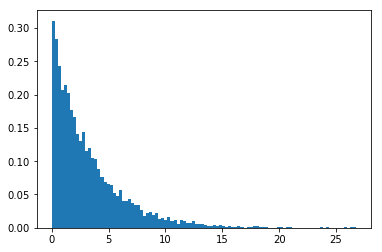

In [ ]:
# Plot
import maplotlib.pyplot as plt

plt.hist(x=exponential.sample(sample_shape=5000), bins=100, density=True)
plt.show()

In [ ]:
# Define an exponential distribution with a trainable rate parameter
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

exp_train = tfp.distributions.Exponential(
    rate=tf.Variable(initial_value=1., name='rate'),
    name='exp_train')
exp_train.trainable_variables

(<tf.Variable 'rate:0' shape=() dtype=float32, numpy=1.0>,)

In [ ]:
# Define the negative log likelihood
import tensorflow as tf
tf.random.set_seed(seed=42)

def nll(x_train, distribution):
    return -tf.math.reduce_mean(
        input_tensor=distribution.log_prob(value=x_train))

In [ ]:
# Define a function to compute the loss and gradients
import tensorflow as tf
tf.random.set_seed(seed=42)

@tf.function
def get_loss_and_grads(x_train, distribution):
    with tf.GradientTape() as tape:
        tape.watch(tensor=distribution.trainable_variables)
        loss = nll(x_train=x_train, distribution=distribution)
        grads = tape.gradient(target=loss,
            sources=distribution.trainable_variables)
    return loss, grads

In [ ]:
# Optimize
import tensorflow as tf
tf.random.set_seed(seed=42)

def exponential_dist_optimisation(data, distribution):

    # Keep results for plotting
    train_loss_results = []
    train_rate_results = []

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)

    num_steps = 10

    for i in range(num_steps):
        loss, grads = get_loss_and_grads(x_train=data,
            distribution=distribution)
        optimizer.apply_gradients(grads_and_vars=zip(
            grads, distribution.trainable_variables))

        rate_value = distribution.rate.value()
        train_loss_results.append(loss)
        train_rate_results.append(rate_value)

        print("Step {:03d}: Loss: {:.3f}: Rate: {:.3f}".format(
            i, loss, rate_value))

    return train_loss_results, train_rate_results

In [ ]:
# Get some data and train

sampled_data = exponential.sample(sample_shape=5000)
train_loss_results, train_rate_results = exponential_dist_optimisation(
    data=sampled_data, distribution=exp_train)

Step 000: Loss: 3.309: Rate: 0.885
Step 001: Loss: 3.050: Rate: 0.776
Step 002: Loss: 2.821: Rate: 0.675
Step 003: Loss: 2.626: Rate: 0.583
Step 004: Loss: 2.469: Rate: 0.504
Step 005: Loss: 2.352: Rate: 0.437
Step 006: Loss: 2.274: Rate: 0.386
Step 007: Loss: 2.229: Rate: 0.350
Step 008: Loss: 2.208: Rate: 0.328
Step 009: Loss: 2.200: Rate: 0.315


In [ ]:
# Predicted value for the rate parameter

pred_value = exp_train.rate.numpy()
exact_value = exponential.rate.numpy()

print("Exact rate:", exact_value)
print("Pred rate:", pred_value)

Exact rate:  0.3
Pred rate:   0.31472635


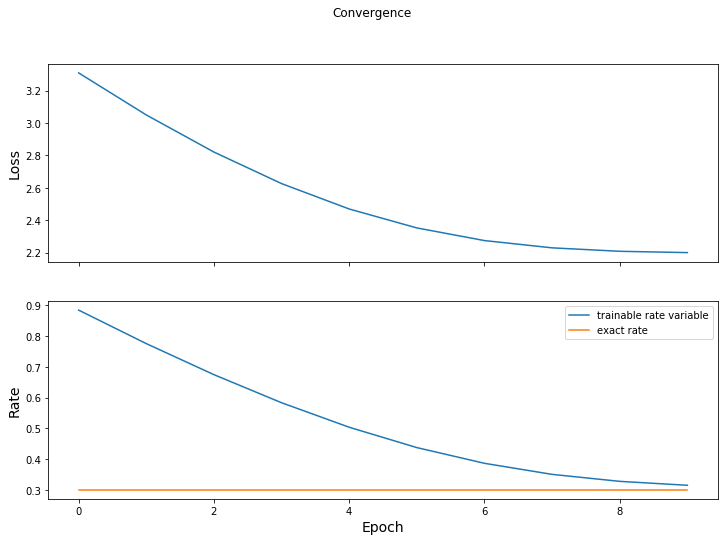

In [ ]:
# Plot to see the convergence of the estimated and true parameters
import tensorflow as tf
tf.random.set_seed(seed=42)
import matplotlib.pyplot as plt

tensor_exact_value = tf.constant(value=exact_value,
    shape=[len(train_rate_results)])

fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))
fig.suptitle(t='Convergence')

axes[0].set_ylabel(ylabel="Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel(ylabel="Rate", fontsize=14)
axes[1].set_xlabel(xlabel="Epoch", fontsize=14)
axes[1].plot(train_rate_results, label='trainable rate variable')
axes[1].plot(tensor_exact_value, label='exact rate')
axes[1].legend()
plt.show()

In [ ]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

from sklearn import datasets
from sklearn.feature_extraction import text

def get_data(categories):

    newsgroups_train_data = datasets.fetch_20newsgroups(
        data_home='20_Newsgroup_Data/', subset='train',
        categories=categories)
    newsgroups_test_data = datasets.fetch_20newsgroups(
        data_home='20_Newsgroup_Data/', subset='test',
        categories=categories)

    n_documents = len(newsgroups_train_data['data'])
    count_vectorizer = text.CountVectorizer(input='content', binary=True,
        max_df=0.25, min_df=1.01/n_documents)
    train_binary_bag_of_words = count_vectorizer.fit_transform(
        raw_documents=newsgroups_train_data['data'])
    test_binary_bag_of_words = count_vectorizer.transform(
        raw_documents=newsgroups_test_data['data'])

    return (train_binary_bag_of_words.todense(),
            newsgroups_train_data['target']), \
        (test_binary_bag_of_words.todense(),
             newsgroups_test_data['target'])

In [ ]:
# Defining a function to conduct laplace smoothing. This adds a base
# level of probability for a given feature to occur in every class.
import numpy as np

def laplace_smoothing(labels, binary_data, n_classes):
    # Compute the parameter estimates (adjusted fraction of documents
    # in class that contain word)
    n_words = binary_data.shape[1]
    alpha = 1 # parameters for Laplace smoothing
    theta = np.zeros(shape=[n_classes, n_words]) # stores parameter values - prob. word given class
    for c_k in range(n_classes): # 0, 1, ..., 19
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0)
            + alpha)/(N + alpha*2)

    return theta

In [ ]:
# Now we will do a function that given the feature occurence counts
# returns a Bernoulli distribution of batch_shape=number of classes
# and event_shape=number of features.
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

def make_distributions(probs):
    # shape (n_classes, n_words)
    batch_of_bernoullis = tfp.distributions.Bernoulli(probs=probs)
    dist = tfp.distributions.Independent(
        distribution=batch_of_bernoullis,
        reinterpreted_batch_ndims=1)
    return dist

In [ ]:
# Function which computes the prior probability of every class
# based on frequency of occurence in the dataset
import numpy as np

def class_priors(n_classes, labels):
    counts = np.zeros(shape=n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(a=np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(a=counts)
    print('The class priors are {}'.format(priors))
    return priors

In [ ]:
# The final function predict_sample which given the distribution,
# a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob
import tensorflow as tf
tf.random.set_seed(seed=42)

def predict_sample(dist, sample, priors):
    cond_probs = dist.log_prob(value=sample)
    joint_likelihood = tf.math.add(x=np.log(priors), y=cond_probs)
    norm_factor = tf.math.reduce_logsumexp(input_tensor=joint_likelihood,
        axis=-1, keepdims=True)
    log_prob = joint_likelihood - norm_factor

    return log_prob

In [ ]:
# Now we learn the distribution using gradient tape
import tensorflow as tf
import tensorflow_probability as tfp
tf.random.set_seed(seed=42)

def make_distribution_withGT(data, labels, nb_classes):

    class_data = []
    train_vars = []
    distributions = []
    for c in range(nb_classes):
        train_vars.append(tf.Variable(initial_value=np.random.uniform(
            low=0.01, high=0.1, size=data.shape[-1])))
        distributions.append(tfp.distributions.Bernoulli(probs=train_vars[c]))
        class_mask = (labels == c)
        class_data.append(data[class_mask, :])

    for c_num in range(0, nb_classes):
        optimizer = tf.keras.optimizers.Adam()
        print('\n%-------------------%')
        print('Class ', c_num)
        print('%-------------------%')

        for i in range(0, 100):
            loss, grads = get_loss_and_grads(x_train=class_data[c_num],
                distribution=distributions[c_num])
            if (i%10==0):
                print("iter: {} loss: {}".format(i, loss))
            optimizer.apply_gradients(grads_and_vars=zip(grads,
                distributions[c_num].trainable_variables))
            eta = 1e-3
            clipped_probs = tf.clip_by_value(
                t=distributions[c_num].trainable_variables,
                clip_value_min=eta, clip_value_max=1)
            train_vars[c_num] = tf.squeeze(input=clipped_probs)

    dist = tfp.distributions.Bernoulli(probs=train_vars)
    dist = tfp.distributions.Independent(
        distribution=dist, reinterpreted_batch_ndims=1)

    print(dist)

    return dist

In [ ]:
# Make the same Naive Bayes classifier we did last tutorial

categories = ['alt.atheism', 'talk.religion.misc',
    'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(
    categories=categories)

smoothed_counts = laplace_smoothing(labels=train_labels,
    binary_data=train_data, n_classes=len(categories))

priors = class_priors(n_classes=len(categories), labels=train_labels)
tf_dist = make_distributions(probs=smoothed_counts)

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [ ]:
# Now train the distributions with gradient tape

GT_dist = make_distribution_withGT(data=train_data,
    labels=train_labels, nb_classes=4)


%-------------------%
Class  0
%-------------------%
iter: 0 loss: 0.07855682454284572
iter: 10 loss: 0.06915748980472317
iter: 20 loss: 0.060414216659008035
iter: 30 loss: 0.052321800626098695
iter: 40 loss: 0.044833687481894376
iter: 50 loss: 0.037904426174938444
iter: 60 loss: 0.031501897781803546
iter: 70 loss: 0.02557889304241362
iter: 80 loss: 0.02009203311509877
iter: 90 loss: 0.015000961760091396

%-------------------%
Class  1
%-------------------%
iter: 0 loss: 0.0716369820925325
iter: 10 loss: 0.06230347958735803
iter: 20 loss: 0.053508155189019
iter: 30 loss: 0.04531840243416014
iter: 40 loss: 0.03771533580185697
iter: 50 loss: 0.030699342336575407
iter: 60 loss: 0.024221137936198033
iter: 70 loss: 0.01824969985609451
iter: 80 loss: 0.012742350222394545
iter: 90 loss: 0.007640409577321614

%-------------------%
Class  2
%-------------------%
iter: 0 loss: 0.0783094403400362
iter: 10 loss: 0.0692229134891275
iter: 20 loss: 0.060853778487910355
iter: 30 loss: 0.0532339053039

In [ ]:
# Compare the two results
import numpy as np
from sklearn import metrics

for dist in [GT_dist, tf_dist]:
    probabilities = []
    for sample, label in zip(test_data, test_labels):
        probabilities.append(predict_sample(
            dist=dist, sample=sample, priors=priors))

    probabilities = np.asarray(a=probabilities)
    predicted_classes = np.argmax(a=probabilities, axis =-1)
    print('f1 ', metrics.f1_score(y_true=test_labels,
        y_pred=predicted_classes, average='macro'))

f1  0.8236432097209768
f1  0.7848499112849504
